- TESLA stock prediction

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing Tesla data
yf.pdr_override()
start = '2010-01-01'
end = '2020-12-31'
df = pdr.get_data_yahoo('TSLA',start,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
df = df.reset_index()
df = df.drop(['Date','Adj Close','Volume'],axis=1)
df.head()

,Open,High,Low,Close
0,1.266667,1.666667,1.169333,1.592667
1,1.719333,2.028000,1.553333,1.588667
2,1.666667,1.728000,1.351333,1.464000
3,1.533333,1.540000,1.247333,1.280000
4,1.333333,1.333333,1.055333,1.074000


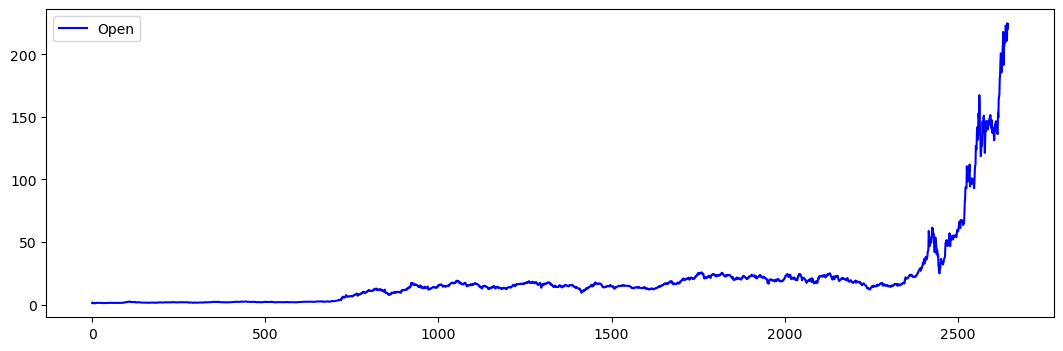

In [4]:
# Plot - Close column
plt.figure(figsize=(13,4))
plt.plot('Open',data=df,color='b')
plt.legend()
plt.show()

In [5]:
# ma100 , ma200
ma100 = df.Open.rolling(100).mean()
ma200 = df.Open.rolling(200).mean()

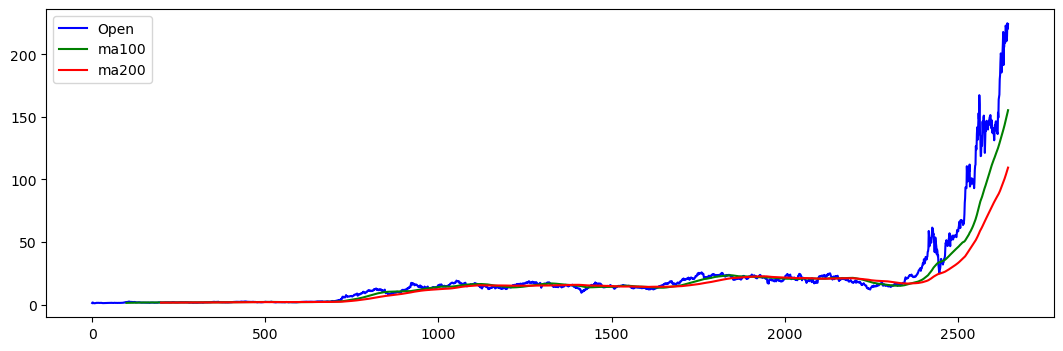

In [6]:
# Plot ma100, ma200
plt.figure(figsize=(13,4))
plt.plot('Open',data=df,color='b')
plt.plot(ma100,color='g',label ='ma100')
plt.plot(ma200,color='r',label='ma200')
plt.legend()
plt.show()

In [7]:
df.shape

(2646, 4)

In [18]:
# Training and Testing Data
training_data = pd.DataFrame(df['Open'][0:int(len(df)*0.70)])
testing_data = pd.DataFrame(df['Open'][int(len(df)*0.70):int(len(df))])

training_data.shape, testing_data.shape

((1852, 1), (794, 1))

In [19]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [20]:
training_data_array= scaler.fit_transform(training_data)

In [22]:
training_data_array.shape

(1852, 1)

In [27]:
# Split
x_train = []
y_train = []

for i in range(100,training_data_array.shape[0]):
    x_train.append(training_data_array[i - 100 : i])
    y_train.append(training_data_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
x_train.shape

(1752, 100, 1)

In [29]:
# Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))      

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [32]:
model.compile(optimizer="adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
55/55 [==============================] - 22s 258ms/step - loss: 0.0464
Epoch 2/50
55/55 [==============================] - 16s 285ms/step - loss: 0.0100
Epoch 3/50
55/55 [==============================] - 15s 280ms/step - loss: 0.0082
Epoch 4/50
55/55 [==============================] - 14s 249ms/step - loss: 0.0080
Epoch 5/50
55/55 [==============================] - 14s 249ms/step - loss: 0.0065
Epoch 6/50
55/55 [==============================] - 13s 245ms/step - loss: 0.0072
Epoch 7/50
55/55 [==============================] - 14s 250ms/step - loss: 0.0066
Epoch 8/50
55/55 [==============================] - 14s 250ms/step - loss: 0.0052
Epoch 9/50
55/55 [==============================] - 14s 252ms/step - loss: 0.0059
Epoch 10/50
55/55 [==============================] - 14s 253ms/step - loss: 0.0063
Epoch 11/50
55/55 [==============================] - 14s 251ms/step - loss: 0.0064
Epoch 12/50
55/55 [==============================] - 14s 250ms/step - loss: 0.0053
Epoch 13/50
5

In [33]:
model.save('keras_model.h6')

INFO:tensorflow:Assets written to: keras_model.h6\assets


In [35]:
past_100_days = training_data.tail(100)
past_100_days

,Open
1752,25.406000
1753,24.833332
1754,25.198668
1755,25.000000
1756,25.111334
...,...
1847,21.316668
1848,21.278667
1849,21.348667
1850,22.150000


In [36]:
final_df = pd.concat([past_100_days,testing_data],ignore_index = True)
final_df.head()

,Open
0,25.406000
1,24.833332
2,25.198668
3,25.000000
4,25.111334


In [37]:
# Scale
input_data = scaler.fit_transform(final_df)

In [38]:
# Split
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [39]:
# Making Predictions 
y_pred = model.predict(x_test)

25/25 [==============================] - 3s 76ms/step


In [44]:
# Scale down
scaler.scale_

array([0.00470006])

In [41]:
scale_factor = 1/0.00470006
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

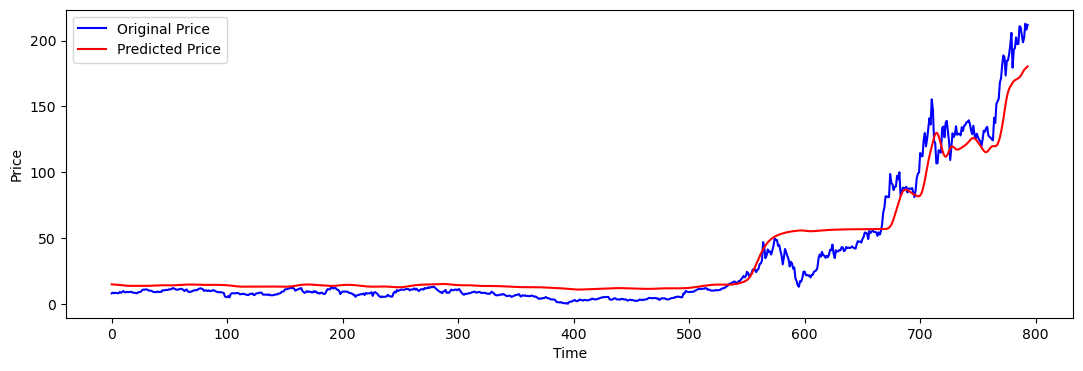

In [45]:
# Plot - Predicted price
plt.figure(figsize=(13, 4))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()